<a href="https://colab.research.google.com/github/somnathsingh31/Projects/blob/Temperory/Deep_learning_model_loan_repayment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [25]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


<AxesSubplot:xlabel='loan_status', ylabel='count'>

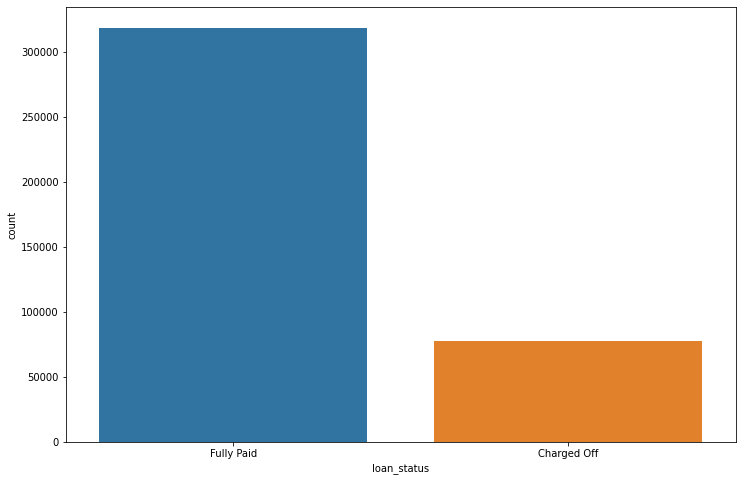

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='loan_status', data = df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

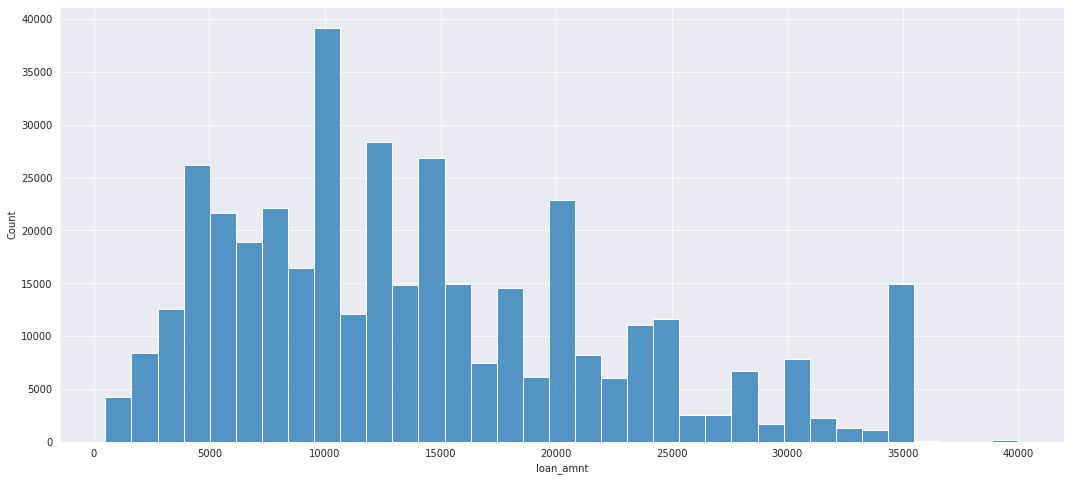

In [32]:
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.histplot(df['loan_amnt'], palette = 'Set2', bins = 35)

In [33]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

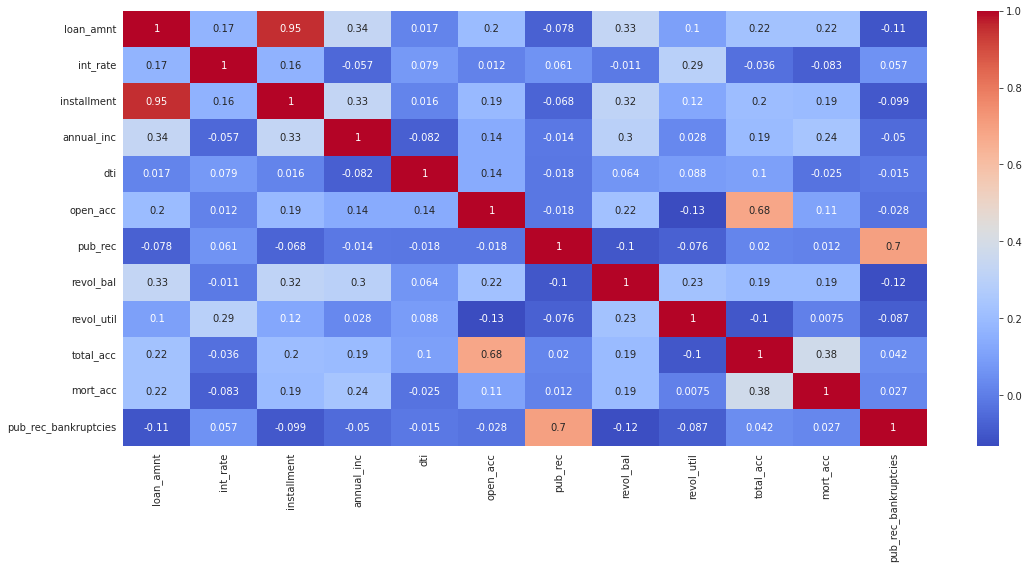

In [41]:
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

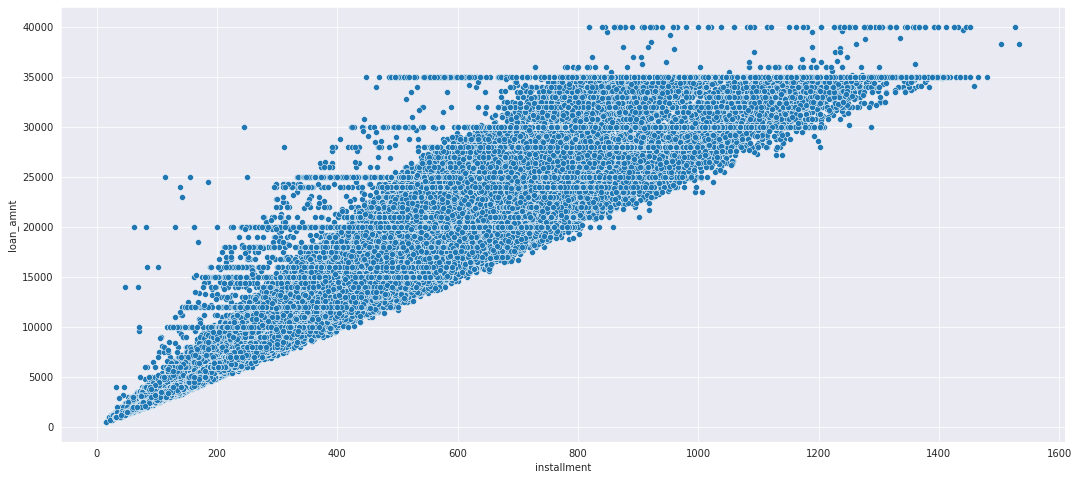

In [42]:
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df, palette = 'Set2')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

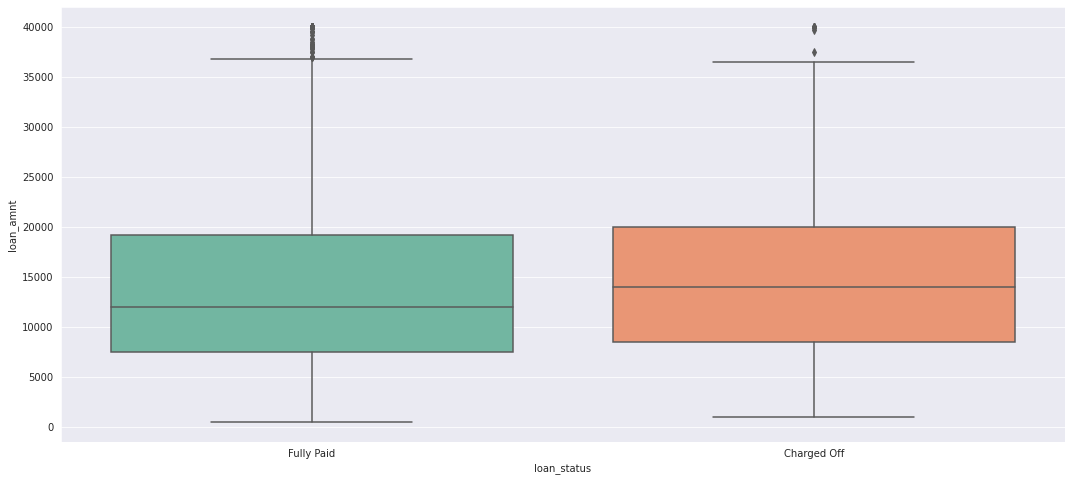

In [43]:
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df, palette = 'Set2')

In [61]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [64]:
print(sorted(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [66]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [65]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<AxesSubplot:xlabel='grade', ylabel='count'>

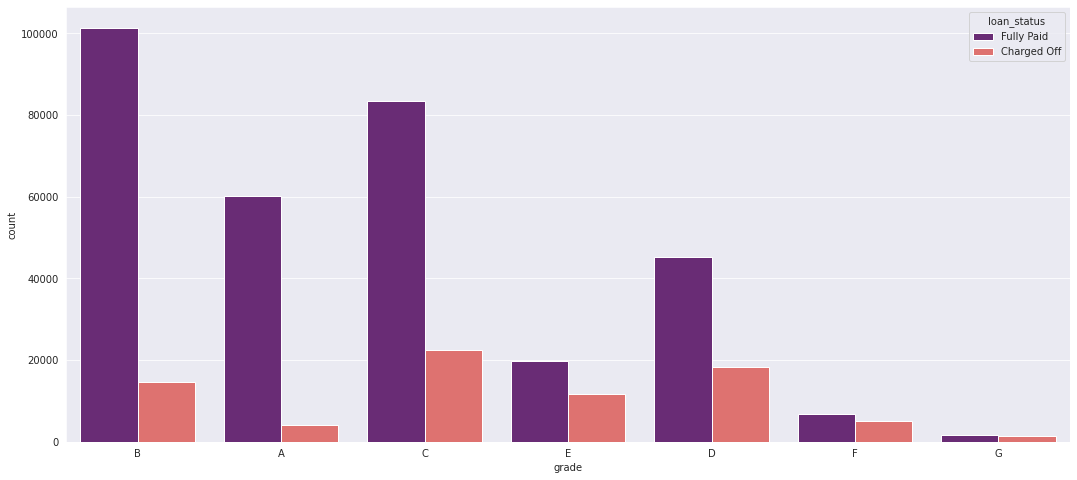

In [68]:
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.countplot(x='grade', data = df, palette = 'magma', hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

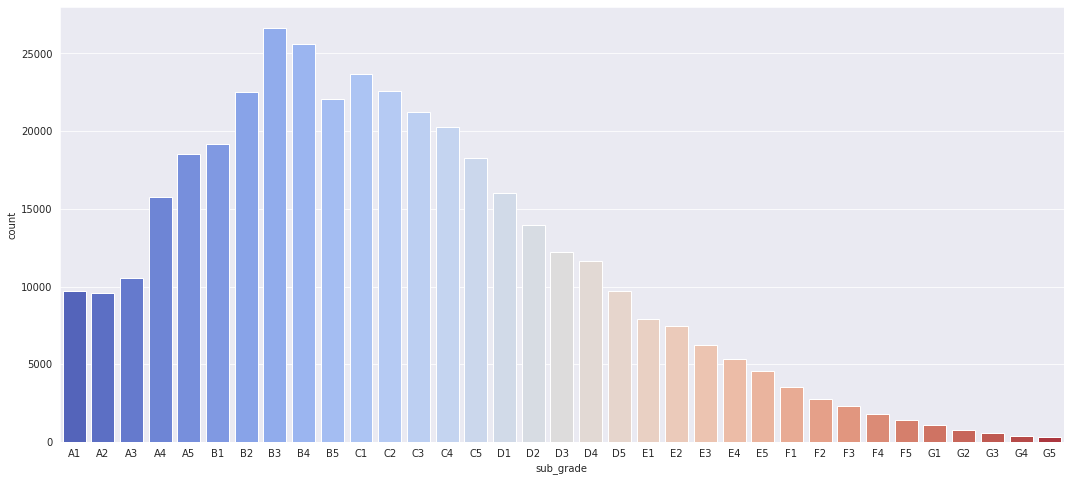

In [84]:
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.countplot(x='sub_grade', data = df.sort_values(by=['sub_grade']), palette = 'coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

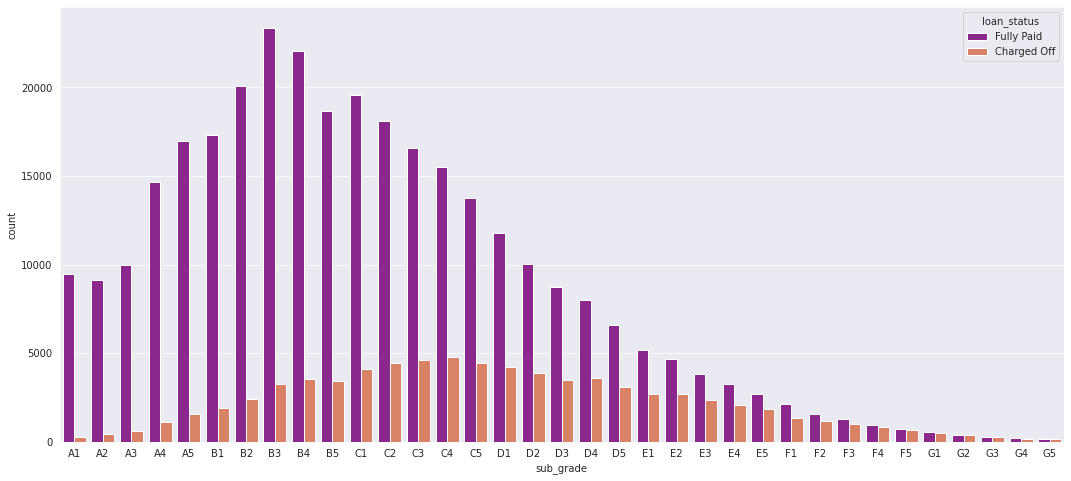

In [87]:
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.countplot(x='sub_grade', data = df.sort_values(by=['sub_grade']), palette = 'plasma',hue = 'loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

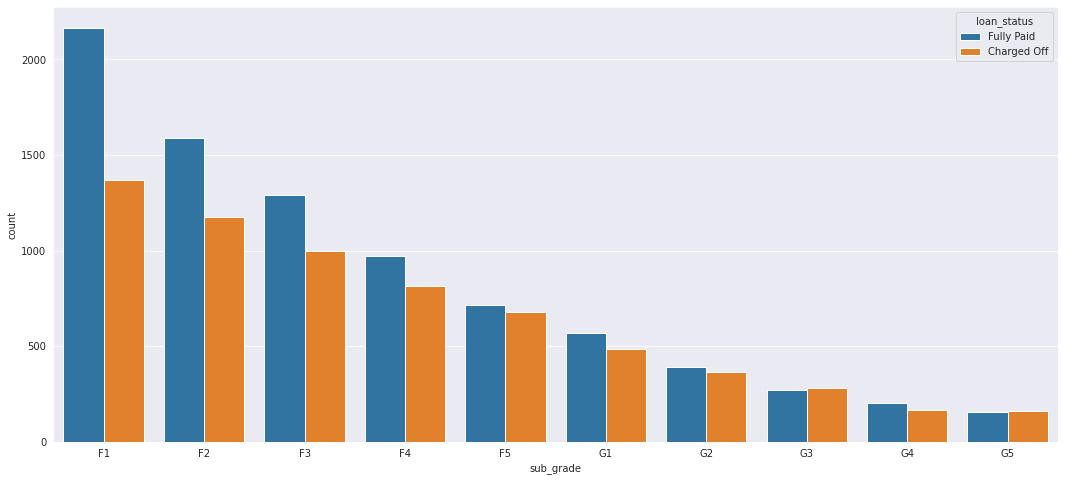

In [95]:
f_g_grade = df[(df['grade']=='G') | (df['grade']=='F')]
subgrade_order = sorted(f_g_grade['sub_grade'].unique())
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.countplot(x='sub_grade', data = f_g_grade, order = subgrade_order, hue = 'loan_status')

In [96]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0 )

#Otherway to do this: df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [98]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [108]:
df.corr()['loan_repaid'].drop('loan_repaid')

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
Name: loan_repaid, dtype: float64

<AxesSubplot:>

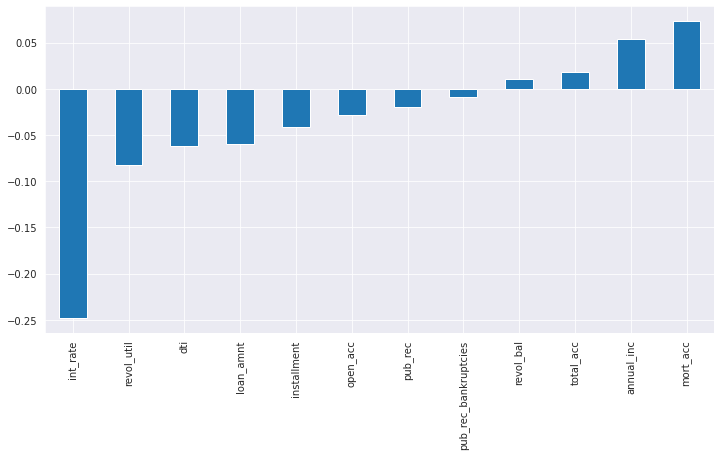

In [115]:
plt.figure(figsize=(12,6))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

**Missing Data**

In [116]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [119]:
(df.isnull().sum() / df.shape[0]) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Employment job title**

In [121]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**Too many employment job titles so can not covert into dummy variables. Lets drop that columns**

In [122]:
df = df.drop('emp_title', axis = 1)

**Now check employment length column**

In [125]:
print((df['emp_length'].dropna().unique()))

['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year']


In [126]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years','8 years', '9 years', '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

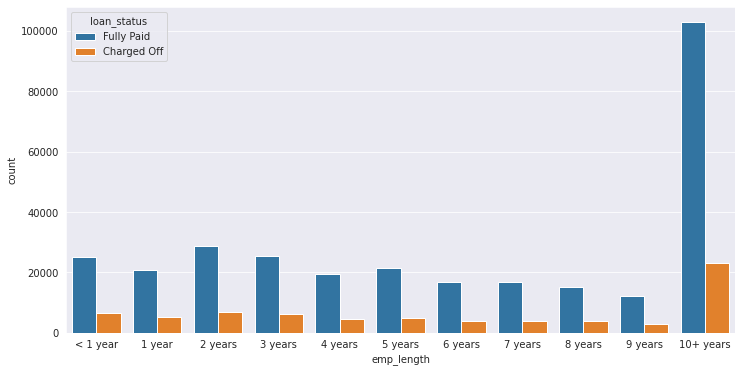

In [130]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.countplot(x='emp_length', data = df, order = emp_length_order,hue = 'loan_status')

**Now see employment length column and calculate the percentage of loan charged off wrt fully paid**

In [136]:
emp_charged_off = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
emp_fully_paid = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

emp_charged_off_percent = (emp_charged_off/ emp_fully_paid) * 100

emp_charged_off_percent

emp_length
1 year       24.864917
10+ years    22.576975
2 years      23.955991
3 years      24.259310
4 years      23.821340
5 years      23.791057
6 years      23.334122
7 years      24.188738
8 years      24.962514
9 years      25.073505
< 1 year     26.082982
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

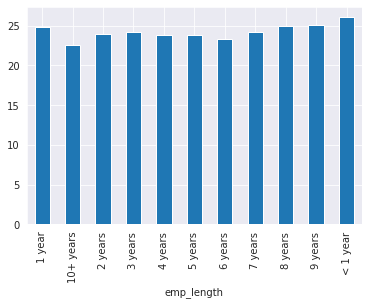

In [137]:
emp_charged_off_percent.plot(kind = 'bar')

**Charge off rates are extremely similar across all employment lengths. Therefore, lets drop the emp_length column.**

In [140]:
df= df.drop('emp_length', axis = 1)

In [141]:
df= df.drop('title', axis = 1)  #Title is string and not that useful

In [144]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [149]:
df.corr()['mort_acc'].sort_values()  # It is most correlated to total_acc, so let us first group by total_acc abd then fill the missing values

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [150]:
df.groupby('total_acc').mean()['mort_acc']  #Mean of mort_acc column per total_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [163]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [164]:
total_acc_avg[135.0]   #see above series

3.0

In [165]:
def fill_mort_acc(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [166]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [169]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [170]:
df = df.dropna()  # Drop all the rows containing NAN. See the reaming NAN are less than 0.5%

In [171]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [172]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [175]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [179]:
df['term'] = df['term'].apply(lambda x: int(x[:2]))

In [180]:
df = df.drop('grade', axis = 1)  #We already know grade is part of sub_grade, so just drop the grade feature.

In [182]:
df = pd.get_dummies(df, columns = ['sub_grade'],drop_first=True)

In [184]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5'],
      dtype='object')

In [185]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [186]:
df = pd.get_dummies(df, columns = ['verification_status', 'application_type','initial_list_status','purpose'],drop_first=True)

In [189]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [190]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [210]:
df = pd.get_dummies(df, columns = ['home_ownership'],drop_first=True)

In [198]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [199]:
df = df.drop('address', axis =1)

In [200]:
df = pd.get_dummies(df, columns = ['zip_code'],drop_first=True)

In [203]:
df = df.drop('issue_d', axis = 1)

In [204]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [205]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [206]:
df = df.drop('earliest_cr_line', axis = 1)

In [211]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [212]:
df = df.drop('loan_status', axis = 1)

In [213]:
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [215]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Creating Model**

In [216]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [223]:
model = Sequential()

#Input Layer
model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

#Hidden Layer
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(18, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.3))

#Output Layer
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [225]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 5, patience = 5)

In [226]:
model.fit(x = X_train, y = y_train, epochs = 100, validation_data=(X_test,y_test), callbacks = [early_stopping], batch_size = 256)

Epoch 1/100
1236/1236 [==============================] - 8s 5ms/step - loss: 0.3235 - val_loss: 0.2675
Epoch 2/100
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2725 - val_loss: 0.2637
Epoch 3/100
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2675 - val_loss: 0.2646
Epoch 4/100
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2655 - val_loss: 0.2640
Epoch 5/100
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2643 - val_loss: 0.2625
Epoch 6/100
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2639 - val_loss: 0.2632
Epoch 7/100
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2636 - val_loss: 0.2631
Epoch 8/100
1236/1236 [==============================] - 8s 7ms/step - loss: 0.2631 - val_loss: 0.2621
Epoch 9/100
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2630 - val_loss: 0.2624
Epoch 10/100
1236/1236 [==============================] - 7s 5ms/step - l

**Evaluating Model Performance**

In [227]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

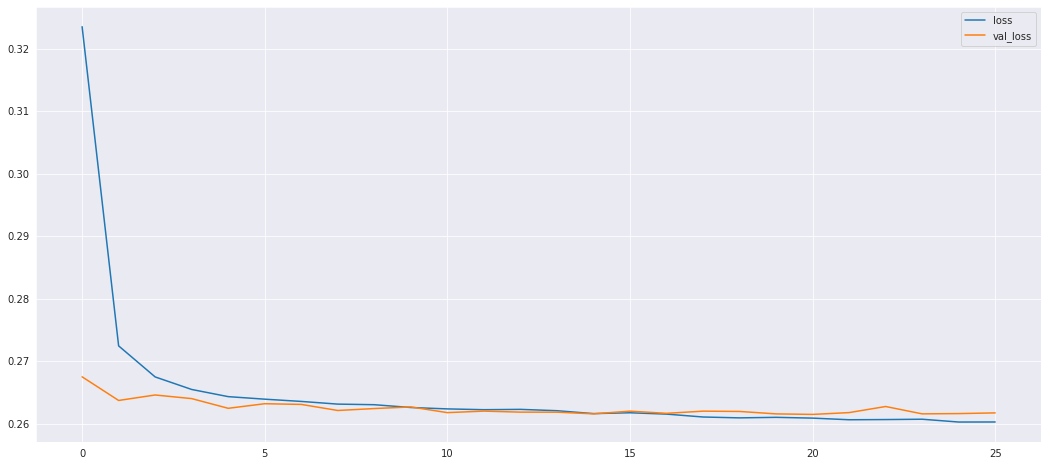

In [231]:
losses.plot(figsize=(18,8))

In [238]:
predictions = model.predict(X_test)

2471/2471 [==============================] - 4s 2ms/step


In [239]:
prediction_class = np.where(predictions > 0.5, 1,0)

In [240]:
from sklearn.metrics import classification_report,confusion_matrix

In [243]:
print(confusion_matrix(y_test,prediction_class))
print('\n')
print(classification_report(y_test,prediction_class))

[[ 6911  8747]
 [  156 63230]]


              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



**Model Performance on new data**

In [244]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt               25000.00
term                        6.00
int_rate                   18.24
installment               638.11
annual_inc              61665.00
                          ...   
zip_code_93700              0.00
earliest_cr_year         1996.00
home_ownership_OTHER        0.00
home_ownership_OWN          0.00
home_ownership_RENT         1.00
Name: 305323, Length: 78, dtype: float64

In [245]:
model.predict(new_customer.values.reshape(1,78))

1/1 [==============================] - 0s 33ms/step


array([[1.]], dtype=float32)

In [246]:
#True value showing if loan was repaid
df.iloc[random_ind]['loan_repaid']

1.0

**Our Model has correctly predicted the input value**